# Distribution by First bar of timeframe 5 minute - Analytics

In [2]:
# Analytic Distribution to open at Open 9:00 AM

### Import Library

In [3]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [4]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [5]:
data = dataset.copy()

In [6]:
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']

In [7]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2025-02-25 14:15:00,1358.4,1360.8,1358.2,1360.5,6708
2025-02-25 14:20:00,1360.3,1362.1,1359.4,1361.0,7025
2025-02-25 14:25:00,1361.0,1362.2,1360.8,1361.7,4896


## Group labeling

In [8]:
## 1 is min, 2 is max, 0 is not min not max
groups = []
for i, row in data.iterrows():
    if row.name.hour == 9 and row.name.minute == 0:
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        data_to_end_day = data[(data.index >=  current_date + ' 09:05:00') & (data.index < current_date + ' 14:30:00')]
        max_High = data_to_end_day['High'].max()
        min_Low = data_to_end_day['Low'].min()
        #
        if row['Open'] > max_High - 3.5:
            # Short
            groups.append(2)
        elif row['Open'] < min_Low + 3.5:
            # Long
            groups.append(1)
        else:
            groups.append(0)
    else:
        groups.append(0)

In [9]:
data['group'] = groups

In [10]:
data_at_9h = data[(data.index.hour == 9) & (data.index.minute == 0)]

In [11]:
data_at_9h

,Open,High,Low,Close,Volume,group
Date,,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910,0
2020-11-03 09:00:00,909.3,909.4,908.5,908.8,1435,2
2020-11-04 09:00:00,909.0,909.9,908.8,908.9,1444,1
2020-11-05 09:00:00,913.7,914.7,913.6,913.6,2193,0
2020-11-06 09:00:00,911.2,912.0,911.2,911.9,1714,2
...,...,...,...,...,...,...
2025-02-19 09:00:00,1337.3,1339.1,1337.3,1338.6,4797,1
2025-02-20 09:00:00,1344.7,1347.5,1344.7,1347.4,5968,1
2025-02-21 09:00:00,1345.0,1346.4,1344.7,1346.2,8044,1


<Axes: xlabel='group'>

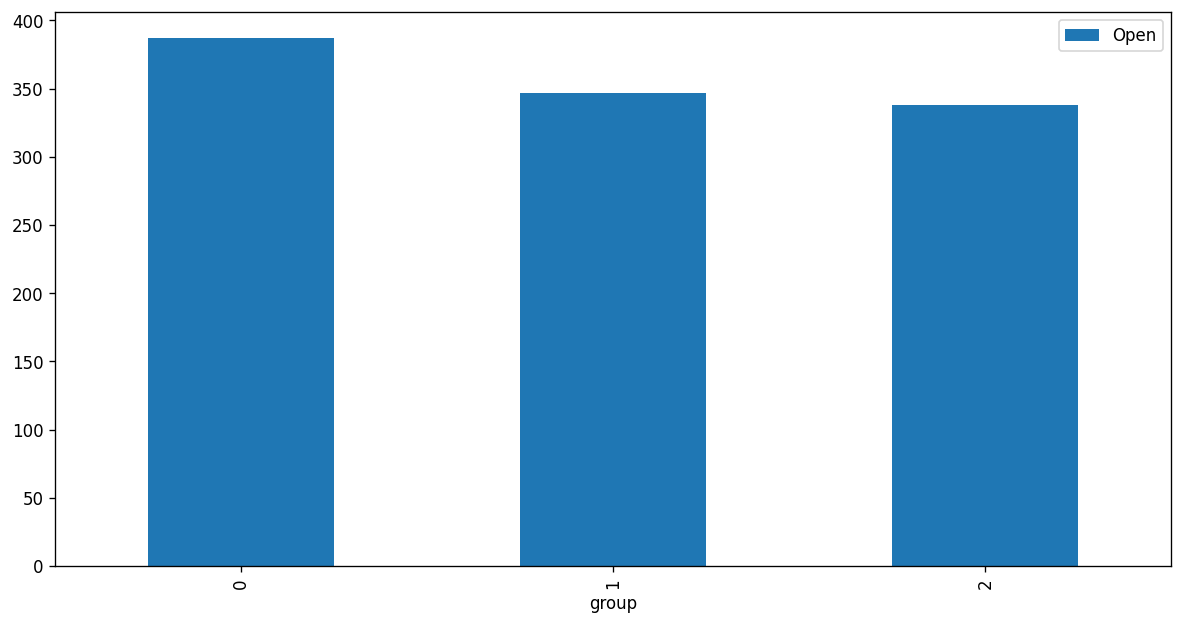

In [12]:
data9h_grouped_by_hour = data_at_9h.groupby(['group'])[['Open']].count()
data9h_grouped_by_hour.plot.bar()

## RSI & Group relationship

In [13]:
df1 = data.copy()
df1['RSI'] = ta.rsi(df1["Close"], length=14)
df1['RSI'] = round(df1['RSI'])
data_at_9h = df1[(df1.index.hour == 9) & (df1.index.minute == 0)]
data_at_9h.dropna(inplace=True)

<Axes: xlabel='RSI'>

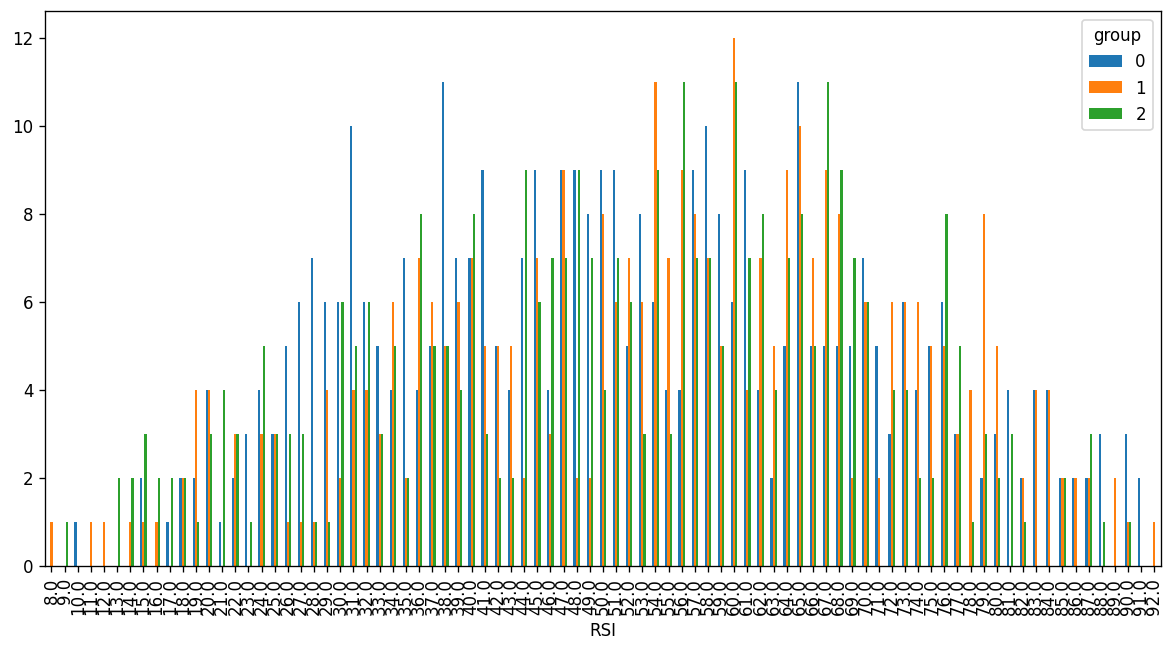

In [14]:
data_at_9h_grouped_by_rsi = data_at_9h.groupby(['RSI', 'group'])['RSI'].count().rename({'RSI': 'count'})
data_at_9h_grouped_by_rsi.unstack().plot.bar()